# Superficial EDA and Data Preparation

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image

In [2]:
# Load data

df = pd.read_csv('../data/Data.csv')

## EDA

### Check Basics

In [33]:
df.sort_values('date_time').head(10)

,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_x,device_user
33296362,2023-06-03 12:25:00,186.73,0.10,0.76,0.001183,0.00,0.00,3,303
33410436,2023-06-03 12:25:00,0.00,0.09,0.76,0.001066,186.93,0.00,3,304
33980806,2023-06-03 12:25:00,0.00,0.08,0.74,0.000922,0.00,186.93,3,309
33752658,2023-06-03 12:25:00,0.00,0.07,0.72,0.000785,0.00,186.93,3,307
33068214,2023-06-03 12:25:00,0.00,0.09,0.72,0.001009,0.00,186.93,3,311
32954140,2023-06-03 12:25:00,186.73,0.08,0.74,0.000921,0.00,0.00,3,310
33866732,2023-06-03 12:25:00,186.73,0.10,0.76,0.001183,0.00,0.00,3,308
32840066,2023-06-03 12:25:00,186.73,0.08,0.75,0.000934,0.00,0.00,3,301
33638584,2023-06-03 12:25:00,0.00,0.08,0.80,0.000997,186.93,0.00,3,306
33182288,2023-06-03 12:25:00,0.00,0.11,0.26,0.000446,0.00,186.93,3,302


In [34]:
df.sort_values('date_time').tail(10)

,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_x,device_user
18684478,2024-09-23 23:55:00,190.19,2.95,0.77,0.036001,0.00,0.00,26,2604
18595970,2024-09-23 23:55:00,0.00,0.13,0.24,0.000490,0.00,188.37,26,2603
9612541,2024-09-23 23:55:00,0.00,0.00,0.00,0.000000,0.00,0.00,16,1608
18507462,2024-09-23 23:55:00,0.00,0.05,0.76,0.000597,188.37,0.00,26,2602
2801630,2024-09-23 23:55:00,0.00,0.08,0.75,0.000939,0.00,187.86,12,1215
18418954,2024-09-23 23:55:00,0.00,0.05,0.74,0.000581,0.00,188.37,26,2616
18330446,2024-09-23 23:55:00,190.19,0.08,0.76,0.000964,0.00,0.00,26,2615
9744160,2024-09-23 23:55:00,0.00,0.00,0.00,0.000000,0.00,0.00,16,1609
18241938,2024-09-23 23:55:00,0.00,0.05,0.72,0.000565,0.00,188.37,26,2614
2889617,2024-09-23 23:55:00,0.00,0.06,0.74,0.000695,187.86,0.00,12,1202


In [5]:
df.describe()

,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_9,consumer_device_x
count,1.381927e+07,3.914756e+07,3.914756e+07,3.914756e+07,1.224839e+07,1.307990e+07,3.914756e+07,3.914756e+07
mean,2.175315e+01,2.014812e-01,7.008604e-02,2.103631e-03,2.016875e+01,1.965710e+01,1.944144e-02,1.985042e+01
std,5.806591e+01,1.666040e+00,2.137210e-01,1.817658e-02,5.657579e+01,5.583761e+01,1.380705e-01,1.094714e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01
max,2.400000e+02,4.539000e+01,9.900000e-01,7.218815e-01,2.400000e+02,2.400000e+02,1.000000e+00,3.900000e+01


In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39147559 entries, 0 to 39147558
Data columns (total 10 columns):
 #   Column             Non-Null Count     Dtype  
---  ------             --------------     -----  
 0   date_time          39147559 non-null  object 
 1   v_red              13819267 non-null  float64
 2   current            39147559 non-null  float64
 3   power_factor       39147559 non-null  float64
 4   kwh                39147559 non-null  float64
 5   Source             39147559 non-null  object 
 6   v_blue             12248394 non-null  float64
 7   v_yellow           13079898 non-null  float64
 8   consumer_device_9  39147559 non-null  int64  
 9   consumer_device_x  39147559 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.9+ GB


In [7]:
df.nunique()

date_time             137803
v_red                  18816
current                 4175
power_factor              97
kwh                  2132866
Source                   585
v_blue                 19048
v_yellow               18970
consumer_device_9          2
consumer_device_x         39
dtype: int64

### Check collumns **consumer_device_9** and **consumer_device_x**

#### Check Equality x = 9

In [8]:
print(df.consumer_device_9.unique())
df.consumer_device_x.unique()

[0 1]


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29,  2, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  3,  4,
        5,  6,  7,  8,  9])

In [9]:
df.groupby('consumer_device_9').consumer_device_x.value_counts()

consumer_device_9  consumer_device_x
0                  16                   2369142
                   32                   2051175
                   15                   1953918
                   17                   1907451
                   11                   1857906
                   2                    1651363
                   36                   1600000
                   8                    1572786
                   13                   1571562
                   37                   1547880
                   25                   1522044
                   35                   1495890
                   26                   1416128
                   24                   1327605
                   12                   1319805
                   22                   1306425
                   3                    1254814
                   5                    1166160
                   27                   1089018
                   4                    1036412
   

#### Remove consumer_device_9

In [10]:
df.pop('consumer_device_9')

0           0
1           0
2           0
3           0
4           0
           ..
39147554    1
39147555    1
39147556    1
39147557    1
39147558    1
Name: consumer_device_9, Length: 39147559, dtype: int64

### Compare column **kWh** with mathematical calculation `consumption[Wh] = V * I * Power_Factor * 1h / (1h/dt)`

Note: We divide by 1000 to account for the "kilo" in kWh and multiply by 1h to get the energy, which would be consumed if the user would consume power for 1 hour. To convert to the given time step resolution we divide by (1h/dt), wich is 12 for dt=5min.

In [ ]:
df.eval('consum = (v_red + v_blue + v_yellow) * current * power_factor / 12 / 1000', inplace=True)
print(df.eval('diff_col = kwh - consum').diff_col.unique())
print('\nAny difference larger than 1e-15:', any((abs(df.eval('diff_col = kwh - consum').diff_col.unique()) > 1e-15) == True))

[ 0.00000000e+00 -9.99634403e-17 -1.08420217e-19 -6.66784336e-17
 -9.98550201e-17 -3.32850067e-17 -6.66513286e-17 -9.99092302e-17
 -2.16840434e-19 -3.33934269e-17 -3.35018471e-17 -1.00071861e-16
 -3.33392168e-17 -5.42101086e-20 -1.00017650e-16 -9.99905454e-17
 -6.66648811e-17 -6.67868538e-17 -6.64615932e-17 -6.65700134e-17
 -3.33121117e-17 -6.67326437e-17 -1.62630326e-19 -6.66242235e-17
 -3.34476370e-17 -3.31765865e-17 -2.71050543e-20 -6.68952740e-17
 -6.70036943e-17 -9.97465999e-17 -3.36102673e-17 -5.55111512e-17
 -8.32667268e-17 -1.11022302e-16 -1.04083409e-16 -6.66919861e-17
 -6.67055387e-17 -1.35525272e-20 -3.33663219e-17 -4.16333634e-17
 -1.38777878e-17 -2.77555756e-17 -9.71445147e-17 -3.33527693e-17
 -6.24500451e-17 -1.66533454e-16 -1.00180281e-16 -9.88792381e-17
 -3.32307966e-17 -4.33680869e-19 -6.93889390e-17 -6.93889390e-18
 -9.02056208e-17 -7.63278329e-17 -3.25260652e-19 -3.12250226e-17
 -3.46944695e-18 -1.00397121e-16 -3.46944695e-17 -2.08166817e-17
 -9.95297594e-17 -6.63531

In [75]:
print(df.eval('diff_col = kwh - consum').loc[:, 'diff_col'].value_counts())
print(df.eval('diff_col = kwh - consum').loc[df.v_red > 0.0, 'diff_col'].value_counts())
print(df.eval('diff_col = kwh - consum').loc[df.v_blue > 0.0, 'diff_col'].value_counts())
print(df.eval('diff_col = kwh - consum').loc[df.v_yellow > 0.0, 'diff_col'].value_counts())

diff_col
 0.000000e+00    36002936
-9.996344e-17      411611
-1.084202e-19      307730
-3.339343e-17      201307
-6.667843e-17      167428
                   ...   
 1.694066e-21           2
-8.470329e-22           1
-3.329856e-17           1
-3.325790e-17           1
-7.025630e-17           1
Name: count, Length: 137, dtype: int64
diff_col
 0.000000e+00    697260
-9.996344e-17    141845
-1.084202e-19    107392
-3.339343e-17     70771
-6.667843e-17     57374
                  ...  
-8.673617e-17         2
-6.663778e-17         2
-7.025630e-17         1
-4.510281e-17         1
-3.035766e-17         1
Name: count, Length: 131, dtype: int64
diff_col
 0.000000e+00    533775
-9.996344e-17    124510
-1.084202e-19     95293
-3.339343e-17     58552
-6.667843e-17     49335
                  ...  
-6.808790e-17         1
-8.673617e-17         1
-3.355606e-17         1
-3.329856e-17         1
-3.325790e-17         1
Name: count, Length: 133, dtype: int64
diff_col
 0.000000e+00    480052
-9.996344

### Check collumn **Source**

#### Check composition of Source

In [11]:
df.Source.unique()

array(['consumer_device_10_data_user_1',
       'consumer_device_10_data_user_10',
       'consumer_device_10_data_user_11',
       'consumer_device_10_data_user_12',
       'consumer_device_10_data_user_13',
       'consumer_device_10_data_user_14',
       'consumer_device_10_data_user_15',
       'consumer_device_10_data_user_16',
       'consumer_device_10_data_user_17',
       'consumer_device_10_data_user_18',
       'consumer_device_10_data_user_2', 'consumer_device_10_data_user_3',
       'consumer_device_10_data_user_4', 'consumer_device_10_data_user_5',
       'consumer_device_10_data_user_6', 'consumer_device_10_data_user_7',
       'consumer_device_10_data_user_8', 'consumer_device_10_data_user_9',
       'consumer_device_11_data_user_1',
       'consumer_device_11_data_user_10',
       'consumer_device_11_data_user_11',
       'consumer_device_11_data_user_12',
       'consumer_device_11_data_user_13',
       'consumer_device_11_data_user_14',
       'consumer_device_11_dat

#### Convert Sorce to numerically accessible values (unambiguously linked to user)

In [12]:
df.eval('device_user = Source', inplace=True)
df.device_user = df.device_user.apply(lambda x: x[-2:].lstrip('_')).astype(int)
df.eval('device_user = consumer_device_x*100 + device_user', inplace=True)
print(df.device_user.unique())

[1001 1010 1011 1012 1013 1014 1015 1016 1017 1018 1002 1003 1004 1005
 1006 1007 1008 1009 1101 1110 1111 1112 1113 1114 1115 1116 1117 1118
 1102 1103 1104 1105 1106 1107 1108 1109 1201 1210 1211 1212 1213 1214
 1215 1202 1203 1204 1205 1206 1207 1208 1209 1301 1310 1311 1312 1313
 1314 1315 1316 1317 1318 1302 1303 1304 1305 1306 1307 1308 1309 1401
 1402 1403 1404 1501 1510 1511 1512 1513 1514 1515 1516 1517 1518 1502
 1503 1504 1505 1506 1507 1508 1509 1601 1610 1611 1612 1613 1614 1615
 1616 1617 1618 1602 1603 1604 1605 1606 1607 1608 1609 1701 1710 1711
 1712 1713 1714 1715 1716 1717 1702 1703 1704 1705 1706 1707 1708 1709
 1801 1810 1811 1812 1813 1814 1815 1816 1817 1818 1802 1803 1804 1805
 1806 1807 1808 1809 1901 1910 1911 1912 1913 1914 1915 1916 1917 1902
 1903 1904 1905 1906 1907 1908 1909  101  102  103  104  105  106  107
  108  109 2001 2010 2011 2012 2013 2014 2015 2016 2002 2003 2004 2005
 2006 2007 2008 2009 2101 2110 2111 2112 2113 2114 2115 2116 2117 2118
 2102 

#### Remove Source

In [13]:
df.pop('Source')
#df.pop('consumer_device_x')

0           consumer_device_10_data_user_1
1           consumer_device_10_data_user_1
2           consumer_device_10_data_user_1
3           consumer_device_10_data_user_1
4           consumer_device_10_data_user_1
                         ...              
39147554     consumer_device_9_data_user_9
39147555     consumer_device_9_data_user_9
39147556     consumer_device_9_data_user_9
39147557     consumer_device_9_data_user_9
39147558     consumer_device_9_data_user_9
Name: Source, Length: 39147559, dtype: object

### Check collumn **date_time**

#### Check type

In [14]:
type(df.date_time[0])

str

#### Convert to pandas datetime format

In [15]:
df['date_time'] = pd.to_datetime(df['date_time'])

#### Optional: separate into date, hour, and minutes

In [16]:
#df.eval("date = date_time.dt.floor('D')", inplace=True)
#df.eval('hour = date_time.dt.hour', inplace=True)
#df.eval('minutes = date_time.dt.minute', inplace=True)

In [17]:
#print(df['date'].dtype)   # very likely "object"
#print(type(df['date'].iloc[0]))  # datetime.date

In [18]:
#print(df.groupby(['device','user','date','hour']).count().value_counts())

### Check dataframe for missing values and unique items

In [19]:
print(df.info(show_counts=True))
print(df.nunique())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39147559 entries, 0 to 39147558
Data columns (total 9 columns):
 #   Column             Non-Null Count     Dtype         
---  ------             --------------     -----         
 0   date_time          39147559 non-null  datetime64[ns]
 1   v_red              13819267 non-null  float64       
 2   current            39147559 non-null  float64       
 3   power_factor       39147559 non-null  float64       
 4   kwh                39147559 non-null  float64       
 5   v_blue             12248394 non-null  float64       
 6   v_yellow           13079898 non-null  float64       
 7   consumer_device_x  39147559 non-null  int64         
 8   device_user        39147559 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 2.6 GB
None
date_time             137803
v_red                  18816
current                 4175
power_factor              97
kwh                  2132866
v_blue                 19048


,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_x,device_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,NaN,NaN,10,1001
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,NaN,NaN,10,1001
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,NaN,NaN,10,1001
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,NaN,NaN,10,1001
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,NaN,NaN,10,1001


#### Optional: create column with electric power phase labels

In [20]:
# df['color'] = 'nan'
# df.loc[df.v_red.notna(), 'color'] = 'r'
# print(df.color.value_counts())
# df.loc[df.v_blue.notna(), 'color'] = 'b'
# print(df.color.value_counts())
# df.loc[df.v_yellow.notna(), 'color'] = 'y'
# df.color.value_counts()

#### Check uniqueness of phase per housholds

In [21]:
for i in df.consumer_device_x.unique():
    print(i)
    print(df.loc[df.consumer_device_x==i,:].device_user.value_counts())

10
device_user
1001    18212
1010    18212
1008    18212
1007    18212
1006    18212
1005    18212
1004    18212
1003    18212
1002    18212
1018    18212
1017    18212
1016    18212
1015    18212
1014    18212
1013    18212
1012    18212
1011    18212
1009    18212
Name: count, dtype: int64
11
device_user
1101    103217
1110    103217
1108    103217
1107    103217
1106    103217
1105    103217
1104    103217
1103    103217
1102    103217
1118    103217
1117    103217
1116    103217
1115    103217
1114    103217
1113    103217
1112    103217
1111    103217
1109    103217
Name: count, dtype: int64
12
device_user
1201    87987
1210    87987
1211    87987
1212    87987
1213    87987
1214    87987
1215    87987
1202    87987
1203    87987
1204    87987
1205    87987
1206    87987
1207    87987
1208    87987
1209    87987
Name: count, dtype: int64
13
device_user
1301    87309
1310    87309
1308    87309
1307    87309
1306    87309
1305    87309
1304    87309
1303    87309
1302    87309
1318

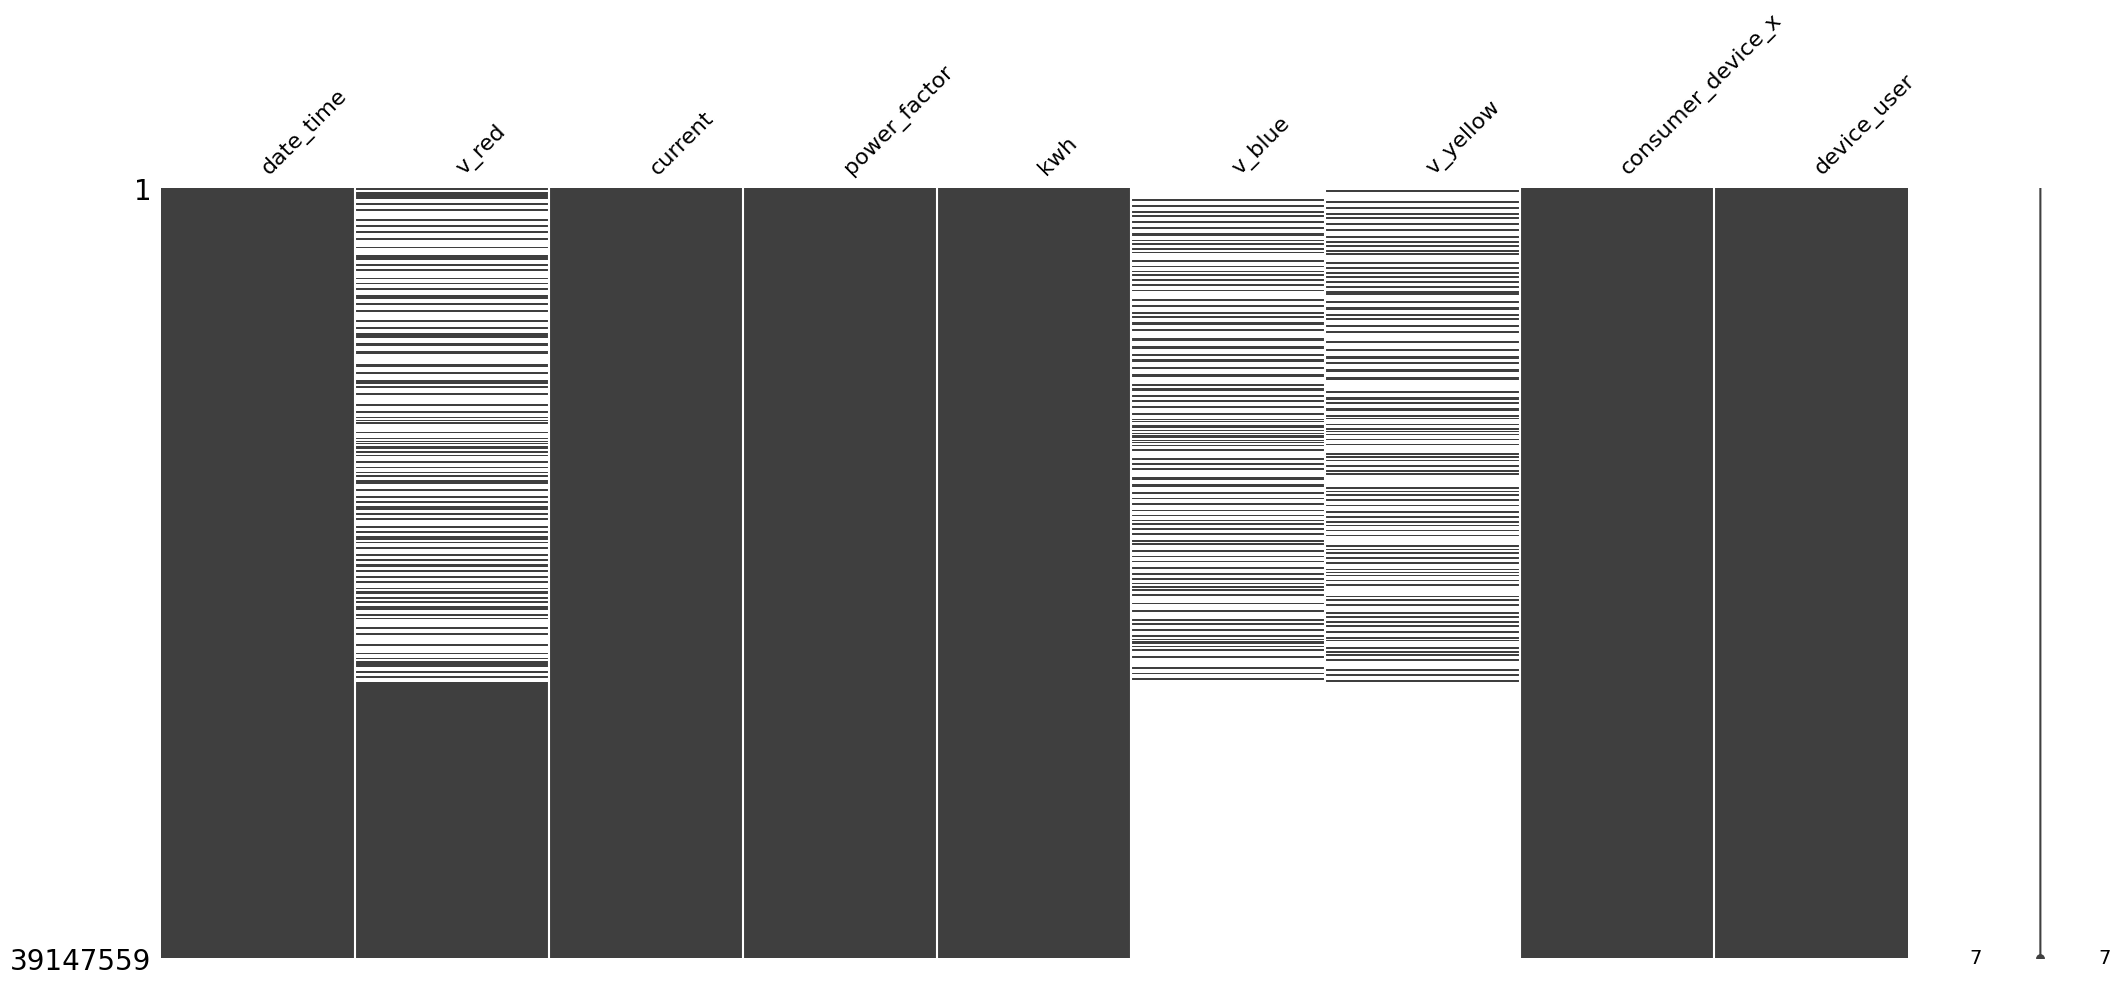

In [22]:
#msno.matrix(df)
Image(filename='../images/missingno_matrix.png')

Observation: Each houshold uses only 1 phase!

#### Fill nan with zeros

In [23]:
df.fillna(0, inplace=True)
df.head(10)

,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_x,device_user
0,2024-07-22 18:20:00,137.65,0.08,0.72,0.000661,0.0,0.0,10,1001
1,2024-07-22 18:25:00,122.82,0.08,0.73,0.000598,0.0,0.0,10,1001
2,2024-07-22 18:30:00,119.70,0.08,0.74,0.000591,0.0,0.0,10,1001
3,2024-07-22 18:35:00,124.53,0.08,0.75,0.000623,0.0,0.0,10,1001
4,2024-07-22 18:40:00,134.84,0.08,0.74,0.000665,0.0,0.0,10,1001
5,2024-07-22 18:45:00,128.87,0.08,0.74,0.000636,0.0,0.0,10,1001
6,2024-07-22 18:50:00,122.40,0.08,0.72,0.000588,0.0,0.0,10,1001
7,2024-07-22 18:55:00,115.22,0.09,0.76,0.000657,0.0,0.0,10,1001
8,2024-07-22 19:00:00,104.07,0.10,0.77,0.000668,0.0,0.0,10,1001
9,2024-07-22 19:05:00,95.49,0.10,0.73,0.000581,0.0,0.0,10,1001


### Check status of dataframe

In [24]:
df.describe()

,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_x,device_user
count,39147559,3.914756e+07,3.914756e+07,3.914756e+07,3.914756e+07,3.914756e+07,3.914756e+07,3.914756e+07,3.914756e+07
mean,2024-03-26 01:42:08.256079872,7.678961e+00,2.014812e-01,7.008604e-02,2.103631e-03,6.310350e+00,6.567789e+00,1.985042e+01,1.993421e+03
min,2023-06-03 12:25:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.010000e+02
25%,2023-12-28 01:12:30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.114000e+03
50%,2024-03-28 09:35:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.716000e+03
75%,2024-06-27 18:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,3.009000e+03
max,2024-09-23 23:55:00,2.400000e+02,4.539000e+01,9.900000e-01,7.218815e-01,2.400000e+02,2.400000e+02,3.900000e+01,3.915000e+03
std,NaN,3.603170e+01,1.666040e+00,2.137210e-01,1.817658e-02,3.299873e+01,3.358114e+01,1.094714e+01,1.094719e+03


In [25]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39147559 entries, 0 to 39147558
Data columns (total 9 columns):
 #   Column             Non-Null Count     Dtype         
---  ------             --------------     -----         
 0   date_time          39147559 non-null  datetime64[ns]
 1   v_red              39147559 non-null  float64       
 2   current            39147559 non-null  float64       
 3   power_factor       39147559 non-null  float64       
 4   kwh                39147559 non-null  float64       
 5   v_blue             39147559 non-null  float64       
 6   v_yellow           39147559 non-null  float64       
 7   consumer_device_x  39147559 non-null  int64         
 8   device_user        39147559 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 2.6 GB


### Plot basic correlations

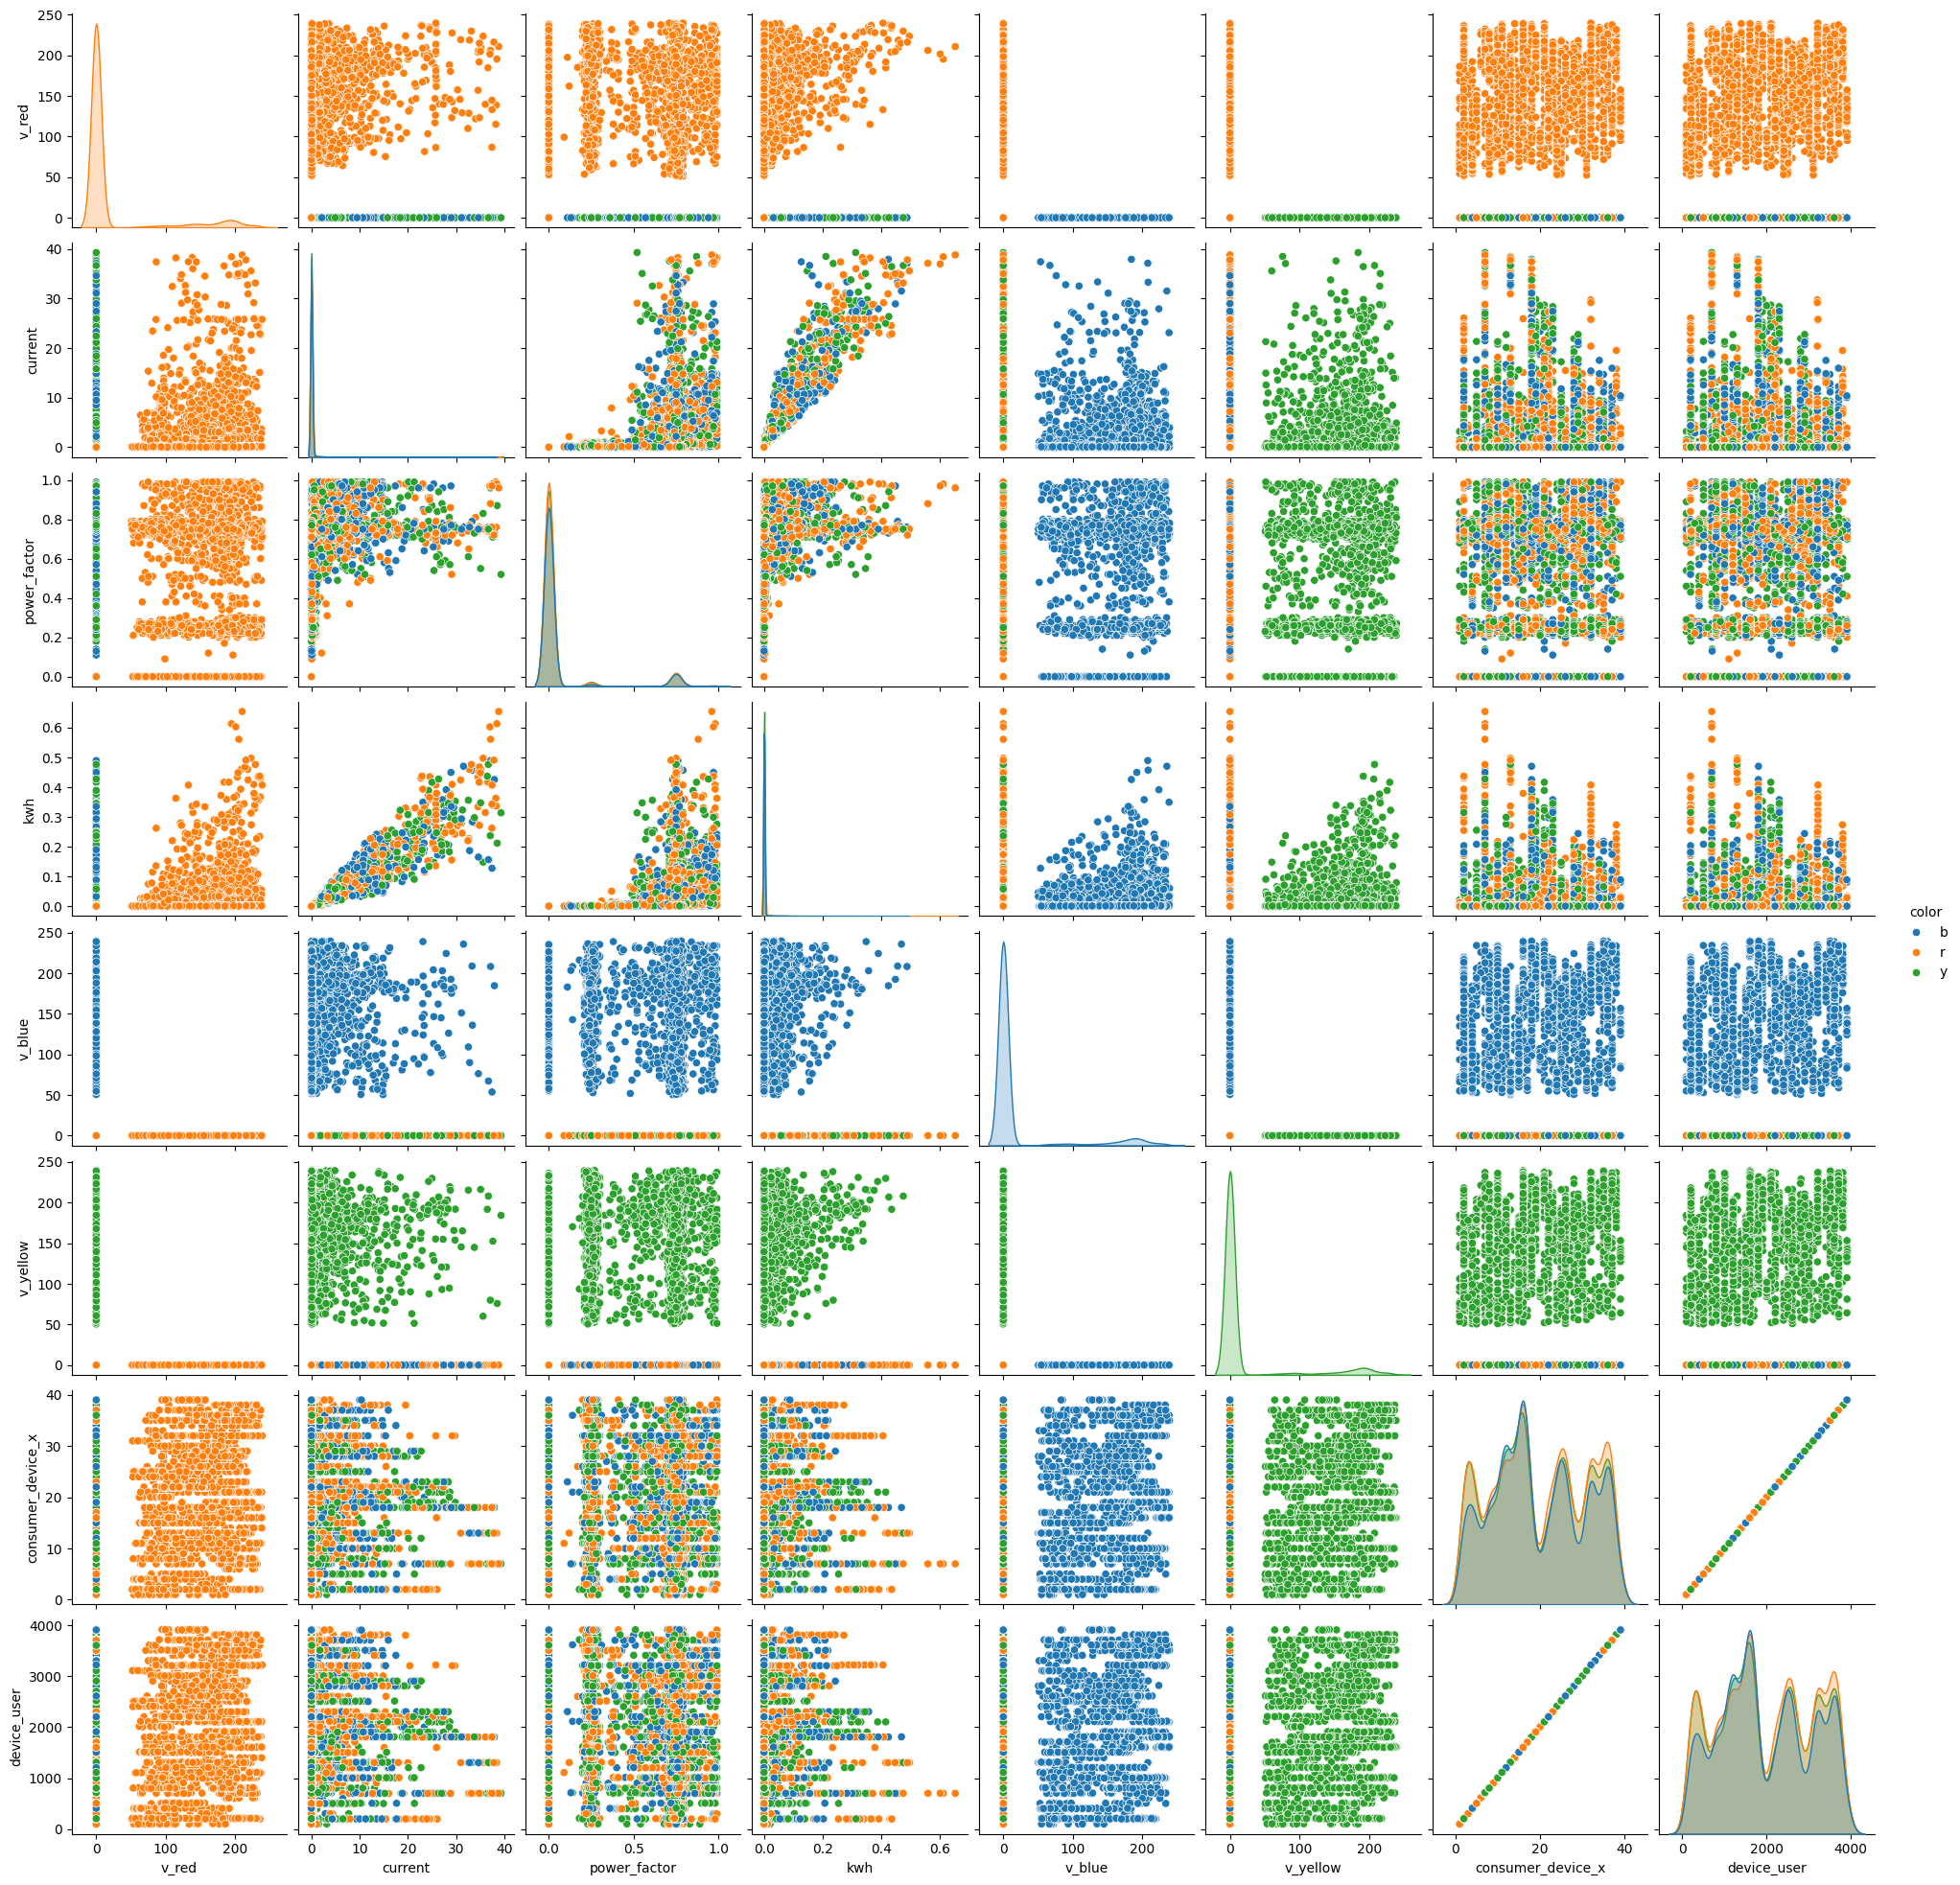

In [26]:
#sns.pairplot(df.sample(100000, axis=0), diag_kind='kde', hue='color')
Image(filename='../images/seaborn_energy_pairplot.png')

## Data preparation

### Aggregate hourly

Aggregatin methods:
 * power_factor: mean, std
 * current: mean, std, min, max
 * v_red: mean, std
 * v_blue: mean, std
 * v_yellow: mean, std
 * kwh: sum
 * consumer_device_x: mode
 * device_user: mode
 
 * *(Optional) color: mode*

In [28]:
df_hourly = df.groupby('device_user').resample("1H", on="date_time").agg({
    "power_factor": ["mean", "std"],
    "current": ["mean", "std", "min", "max"],
    "v_red": ["mean", "std"],
    "v_blue": ["mean", "std"],
    "v_yellow": ["mean", "std"],
    "kwh": "sum",
    "consumer_device_x": lambda x: x.mode()[0],
    "device_user": lambda x: x.mode()[0],
    #"color": lambda x: x.mode()[0]
})

#### Check new dataframe

In [29]:
df_hourly.head()

power_factor             current             
                                        mean       std      mean       std   
device_user date_time                                                        
101         2023-10-12 17:00:00        0.785  0.019149  4.680000  0.131909  \
            2023-10-12 18:00:00        0.770  0.090754  3.240833  1.367522   
            2023-10-12 19:00:00        0.000  0.000000  0.000000  0.000000   
            2023-10-12 20:00:00        0.000  0.000000  0.000000  0.000000   
            2023-10-12 21:00:00        0.460  0.336641  0.083333  0.066788   

                                                  v_red            v_blue   
                                  min   max        mean        std   mean   
device_user date_time                                                       
101         2023-10-12 17:00:00  4.52  4.83   85.492500   3.461689    0.0  \
            2023-10-12 18:00:00  2.04  4.84  130.004167  35.341170    0.0   
            2023-10-12 19:00:00  0.00  0.00    0.000000   0.000000    0.0   
            2023-10-12 20:00:00  0.00  0.00    0.000000   0.000000    0.0   
            2023-10-12 21:00:00  0.00  0.20   70.599167  54.047443    0.0   

                                     v_yellow            kwh   
                                 std     mean  std       sum   
device_user date_time                                          
101         2023-10-12 17:00:00  0.0      0.0  0.0  0.104701  \
            2023-10-12 18:00:00  0.0      0.0  0.0  0.300174   
            2023-10-12 19:00:00  0.0      0.0  0.0  0.000000   
            2023-10-12 20:00:00  0.0      0.0  0.0  0.000000   
            2023-10-12 21:00:00  0.0      0.0  0.0  0.004001   

                                consumer_device_x device_user  
                                         <lambda>    <lambda>  
device_user date_time                                          
101         2023-10-12 17:00:00                 1         101  
            2023-10-12 18:00:00                 1         101  
            2023-10-12 19:00:00                 1         101  
            2023-10-12 20:00:00                 1         101  
            2023-10-12 21:00:00                 1         101

In [32]:
df_hourly.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3262652 entries, (101, Timestamp('2023-10-12 17:00:00')) to (3915, Timestamp('2023-12-23 16:00:00'))
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   (power_factor, mean)           3262652 non-null  float64
 1   (power_factor, std)            3262634 non-null  float64
 2   (current, mean)                3262652 non-null  float64
 3   (current, std)                 3262634 non-null  float64
 4   (current, min)                 3262652 non-null  float64
 5   (current, max)                 3262652 non-null  float64
 6   (v_red, mean)                  3262652 non-null  float64
 7   (v_red, std)                   3262634 non-null  float64
 8   (v_blue, mean)                 3262652 non-null  float64
 9   (v_blue, std)                  3262634 non-null  float64
 10  (v_yellow, mean)               3262652 non-null  float64
 11  (v_ye

#### Save new dataframe

In [31]:
df_hourly.to_csv('../data/energy_data.csv')

## Other interesting observations

The column kWh equals `consumption[Wh] = (v_red + v_blue + v_yellow) * power_factor * current * 1h / (1h/dt)`